## PHESS data exploration 
Public Health Emergency Surveillance System (PHESS) data comes from emergency department services. It provides an opportunity to detect disease outbreaks by tracking early warning disease symptoms. 


### Loading PHESS file 
Here we set the working directory. We will then our check folder contents and load the PHESS data with stringsAsFactors option set as FALSE. 

In [1]:
getwd()
setwd("/N/dc2/projects/T15/PHESS") # setting working folder Change this path to the location where YOUR files are

list.files()
file.info("PHESS_SUBSET_FINAL_COPY.csv")
read.csv(file="PHESS_SUBSET_FINAL_COPY.csv",nrows=10)

df <- read.csv("PHESS_SUBSET_FINAL_COPY.csv", stringsAsFactors=FALSE)

[1] "/N/dc2/projects/T15/PHESS"

[1] "1-Descriptives_UK.R"                      
[2] "PHESS_SUBSET_FINAL_2018Oct11_07-48-09.csv"
[3] "PHESS_SUBSET_FINAL_COPY.csv"              
[4] "PHESS_data_dictionary.xlsx"               
[5] "PHESS_dataset_student_guide.docx"         
[6] "PHESS_dataset_student_guide.pdf"          
[7] "PHESS_plots.R"                            
[8] "PHESS_plots_EDITED.R"                     
[9] "T-15 PHESS.ipynb"

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
PHESS_SUBSET_FINAL_COPY.csv,16851333,FALSE,660,2018-10-30 11:12:52,2018-11-15 10:06:22,2018-11-19 00:01:15,498945,1297,ukirbiyi,T15


INTERNAL_PAT_ID,SENDING_APP,SENDING_FAC,AGE,GENDER,RACE,ETHNICITY,ADMIT_REASON,ADMIT_REASON_CLEAN,CHIEF_COMPLAINT,...,FLAG_STI,FLAG_SORE_THROAT,FLAG_SWELLING,FLAG_SINUS,FLAG_FALL,WEEKDAY,AGE_GROUP,TRANSACTION_DAY,TRANSACTION_TIME,ZIP_IS_INDIANA
1,1,1,31,FALSE,AIAN,N,r arm pain,right arm pain,,...,0,0,0,0,0,Monday,45<=,-41,00:24:00,1
2,2,2,49,FALSE,AIAN,N,hand pains,hand pains,,...,0,0,0,0,0,Sunday,60<=,-147,19:42:00,1
3,3,3,53,FALSE,AIAN,N,,,BACK PAIN,...,0,0,0,0,0,Tuesday,60<=,-173,19:53:00,1
4,4,4,10,FALSE,AIAN,U,,,abd pain,...,0,0,0,0,0,Friday,18<=,-163,22:00:00,1
5,4,5,30,FALSE,AIAN,U,,,FALL; ANKLE PAIN,...,0,0,0,0,0,Friday,30<=,65,20:44:00,1
6,4,6,20,FALSE,AIAN,U,,,"Bleeding, vomiting",...,0,0,0,0,0,Friday,30<=,107,13:28:00,1
7,5,7,40,FALSE,AIAN,U,cp,cp,,...,0,0,0,0,0,Friday,45<=,-79,18:21:00,0
8,4,8,32,FALSE,AIAN,U,,,,...,0,0,0,0,0,Friday,45<=,-51,20:48:00,1
9,5,7,36,FALSE,AIAN,U,abd pain,abdominal pains,,...,0,0,0,0,0,Friday,45<=,-44,20:18:00,1
10,4,5,54,FALSE,AIAN,U,,,right side numbness,...,0,0,0,0,0,Friday,60<=,-51,22:18:00,1


#### The codes below depand on dplyr and ggplot2 libraries. Tidyverse package has both. 

In [2]:
library(tidyverse)


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.0.0     <U+221A> purrr   0.2.5
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.6
<U+221A> tidyr   0.8.1     <U+221A> stringr 1.3.1
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


#### We will define the functions firts then we will apply them to the variables to visualize the trends. 

In [3]:
N <- function(x) { return(length(unique(x[which(!is.na(x))]))) }

In [4]:
plot_visits_per_day <- function(df) {
    df %>% 
        group_by(TRANSACTION_DAY) %>%
        summarize(N_VISITS=length(TRANSACTION_DAY)) -> df_gp
    return(ggplot(df_gp, aes(x=TRANSACTION_DAY, y=N_VISITS)) + geom_line() + geom_smooth())
}

In [5]:
plot_dx_per_day <- function(df) {
    df %>% 
        group_by(DX_CODE_SYSTEM, TRANSACTION_DAY) %>% 
        summarise(N_DXS=N(DX_CODE)) -> 
        df_dx
    return(ggplot(df_dx, aes(x=TRANSACTION_DAY, y=N_DXS, color=DX_CODE_SYSTEM, group=DX_CODE_SYSTEM)) + geom_line())
}

In [6]:
plots_by_flag <- function(df, flag) {
    df$FLAG <- df[[flag]]
    
    df %>% 
        filter(FLAG== TRUE) %>% 
        group_by(TRANSACTION_DAY, AGE_GROUP, GENDER) %>% 
        summarise(N_VISITS=length(TRANSACTION_DAY)) -> 
        dft
    

    p <- ggplot(dft, aes(x=TRANSACTION_DAY, y=N_VISITS, group=GENDER, color=GENDER)) + 
        geom_line() + 
        geom_smooth() +
        facet_wrap(~AGE_GROUP) +
        ggtitle(flag)
    
    return(p)
}

In [7]:
#### Plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in grid.Call.graphics(L_polygon, x$x, x$y, index):
"semi-transparency is not supported on this device: reported only once per page"

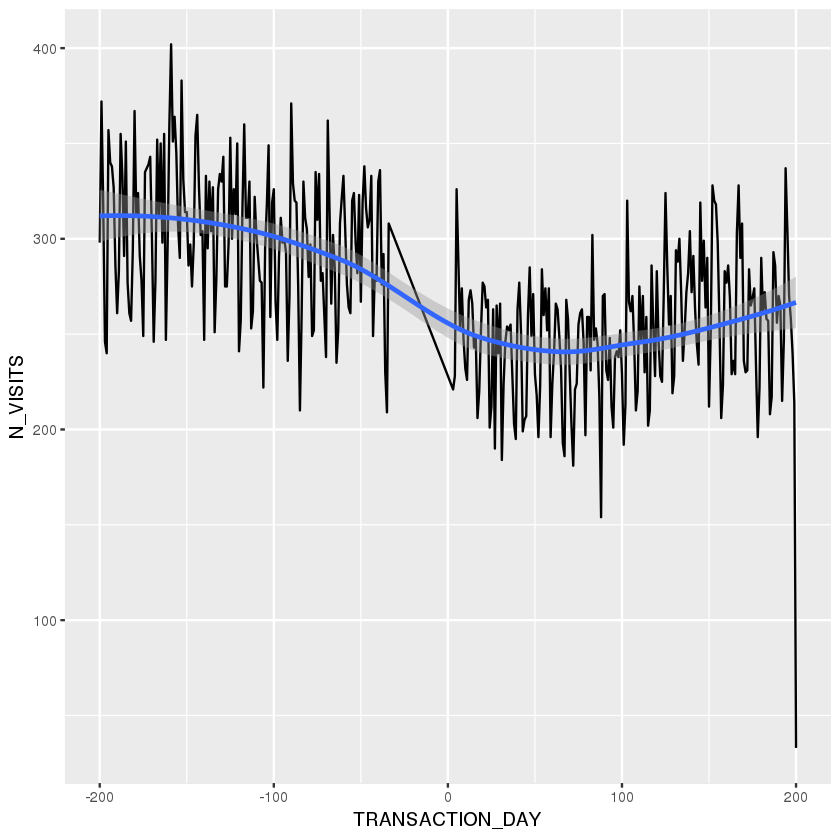

In [8]:
plot_visits_per_day(df)


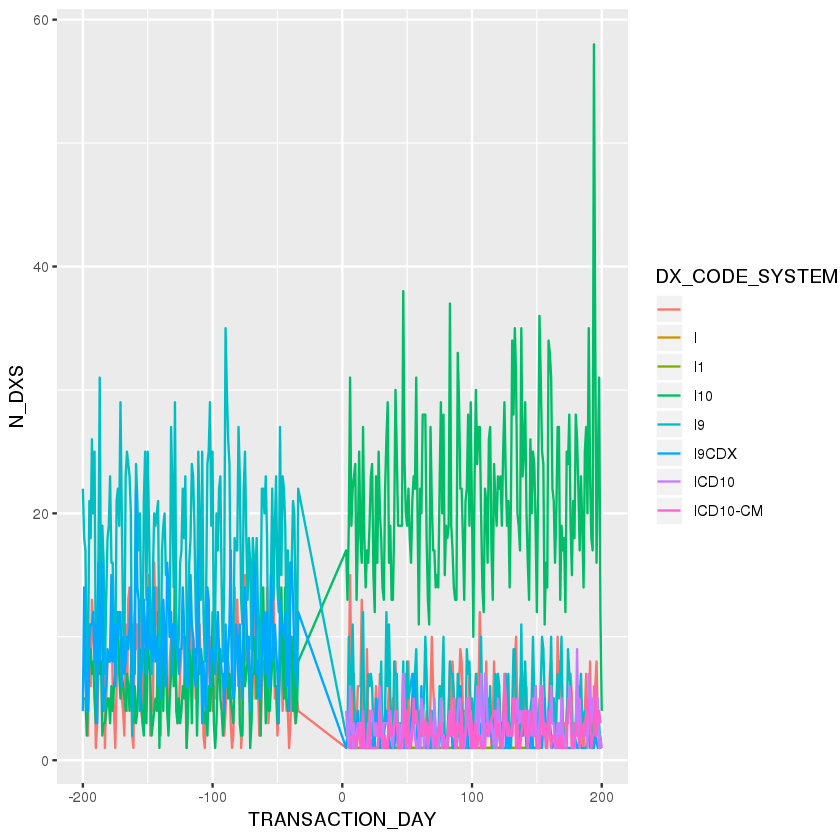

In [9]:
plot_dx_per_day(df) #icd switch visible here

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


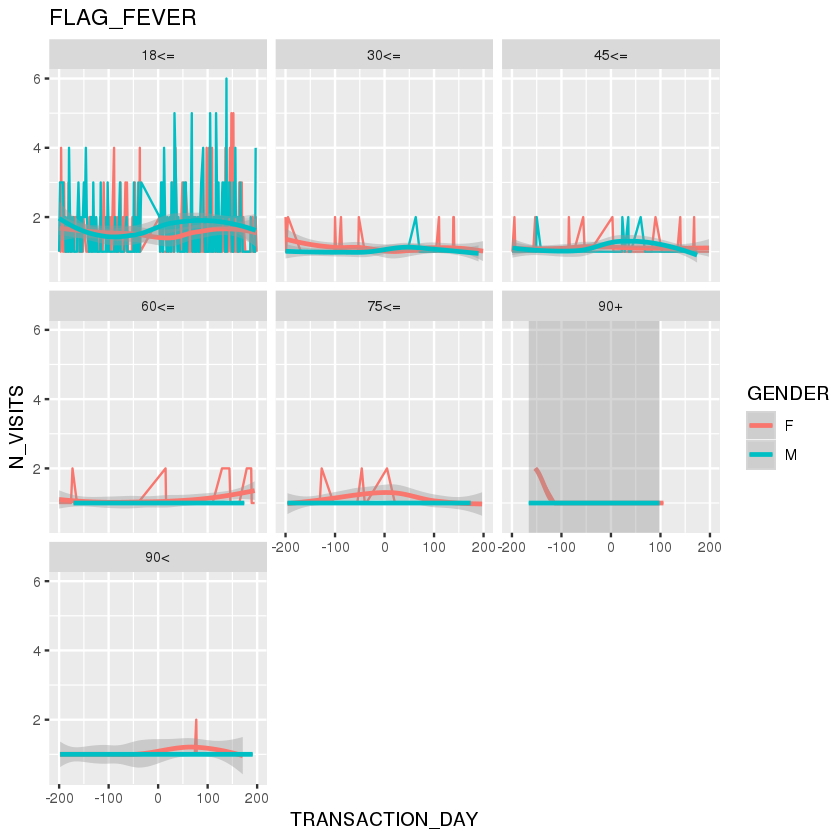

In [13]:
# This code output the graphs with warnings
# R has the option to supress these warnings:
options(warn = -1)

plots_by_flag(df, "FLAG_FEVER")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


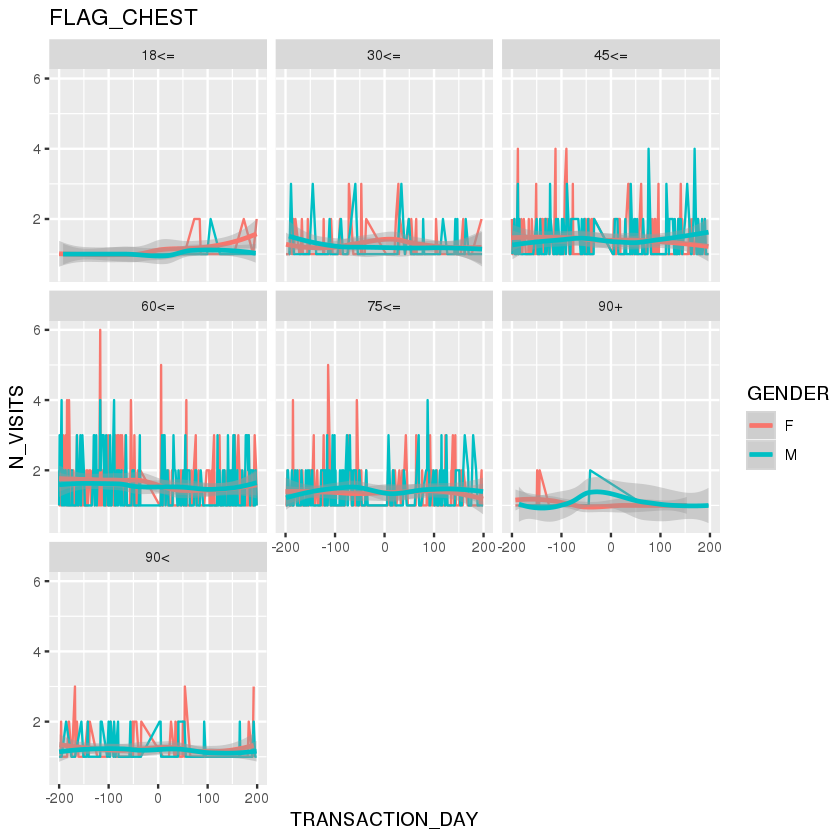

In [14]:
plots_by_flag(df, "FLAG_CHEST")

In [1]:
plots_by_flag(df, "FLAG_COUGH")

ERROR: Error in eval(expr, envir, enclos): could not find function "plots_by_flag"


****
## End of PHESS Exploration